In [5]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=wine.target_names)

print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:\n", report_dt)

Decision Tree Metrics:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



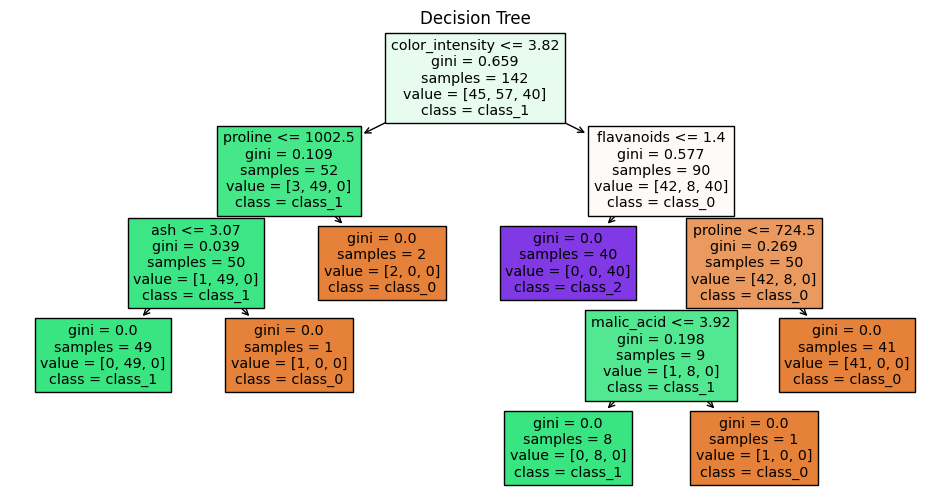

In [7]:
plt.figure(figsize=(12, 6))
plot_tree(
    decision_tree,
    filled=True,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
)
plt.title("Decision Tree")
plt.show()


In [22]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_random_forest = grid_search.best_estimator_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [21]:
y_pred_rf = best_random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=wine.target_names)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)

Random Forest Metrics:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



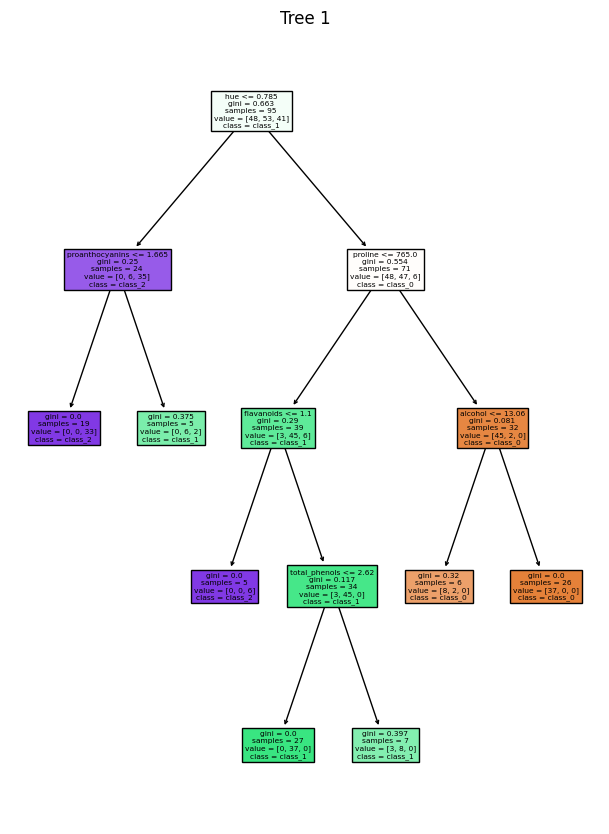

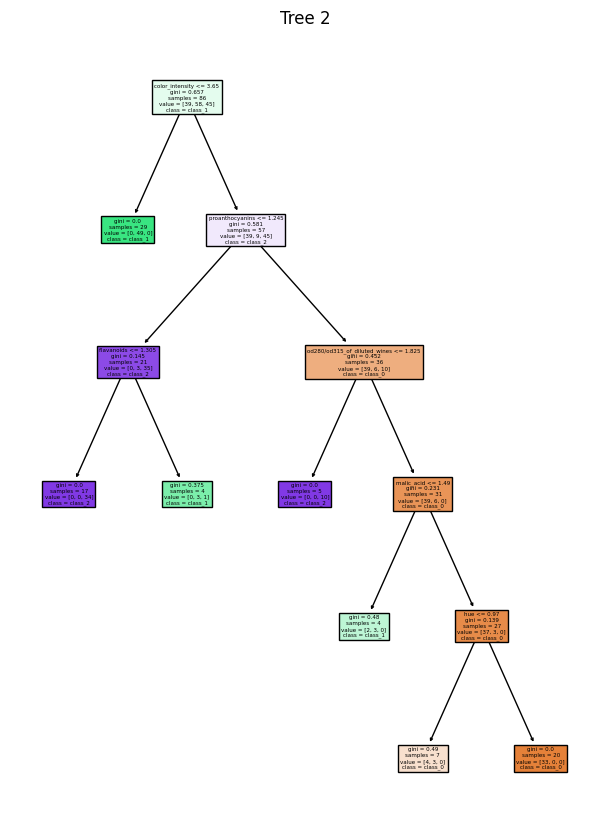

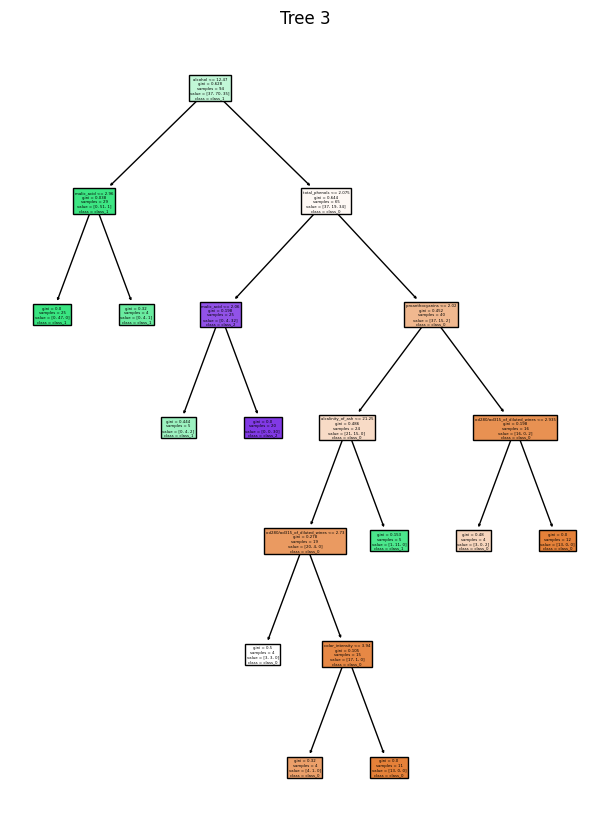

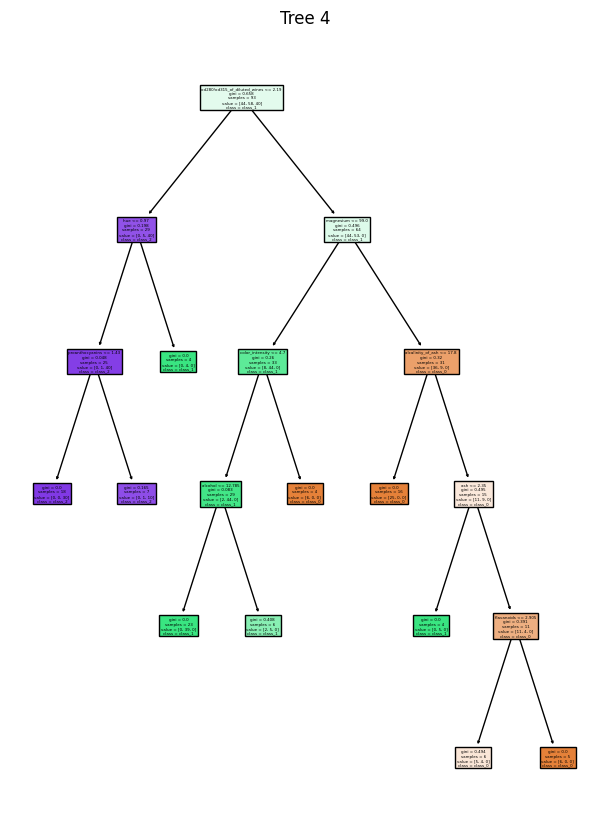

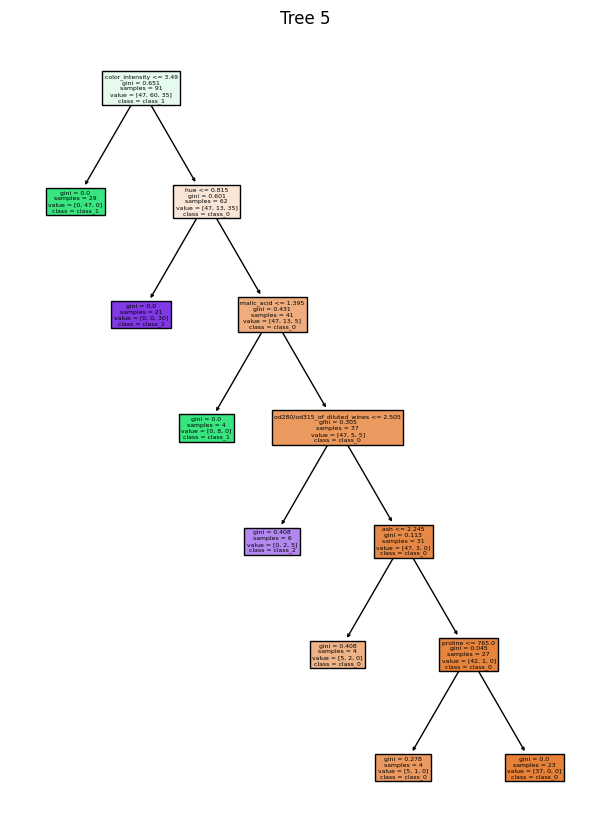

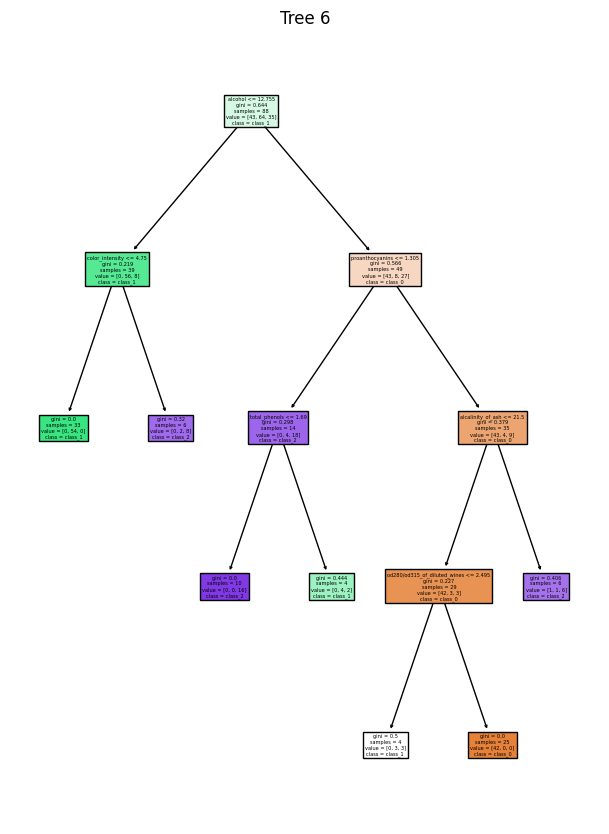

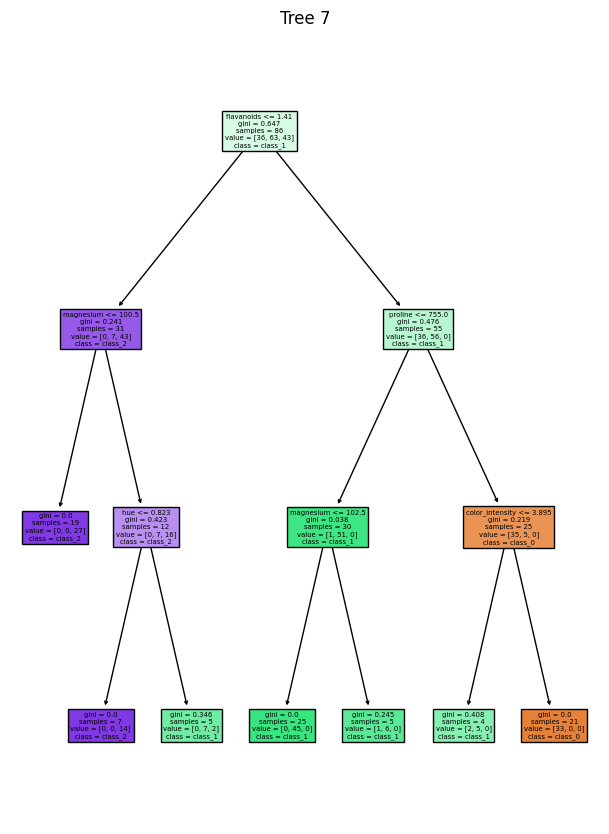

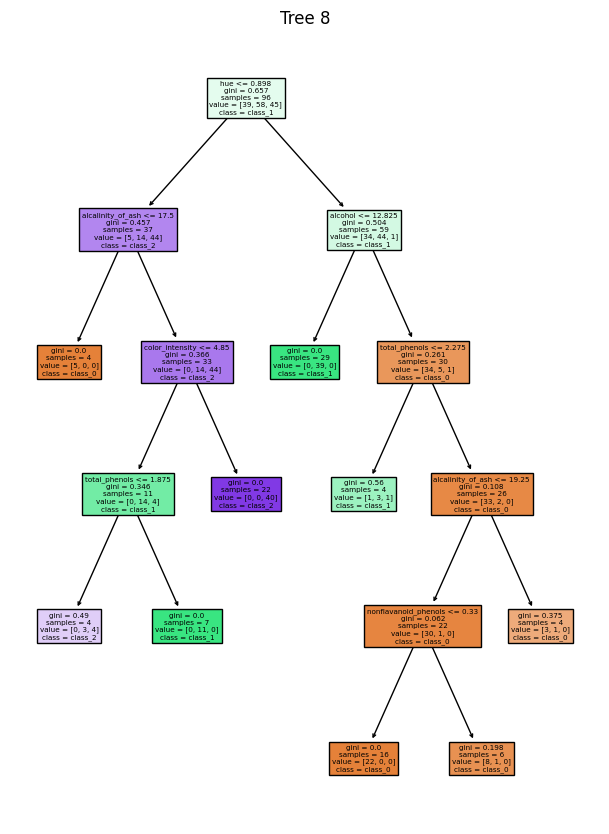

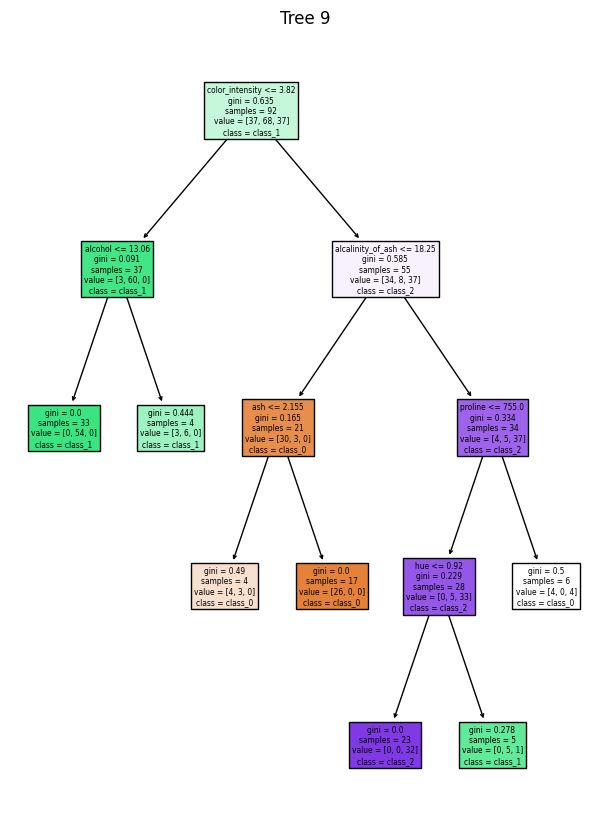

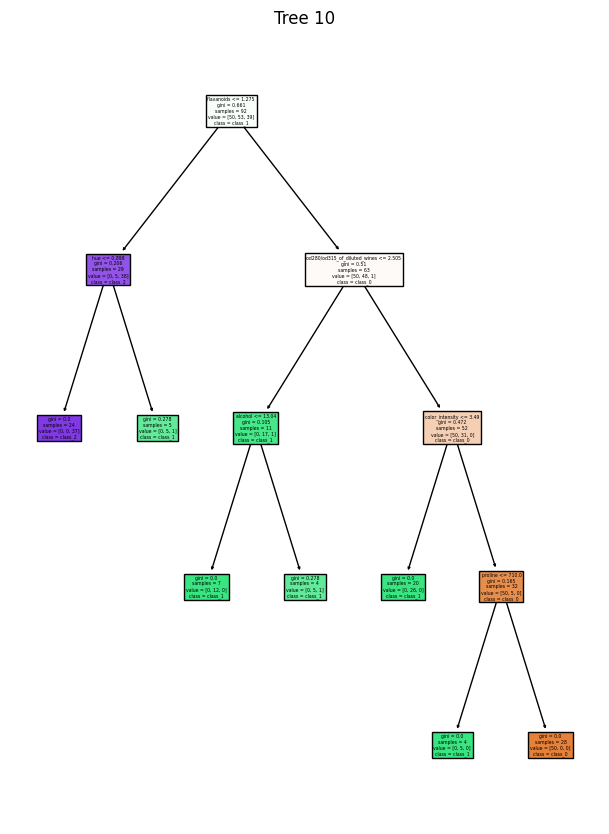

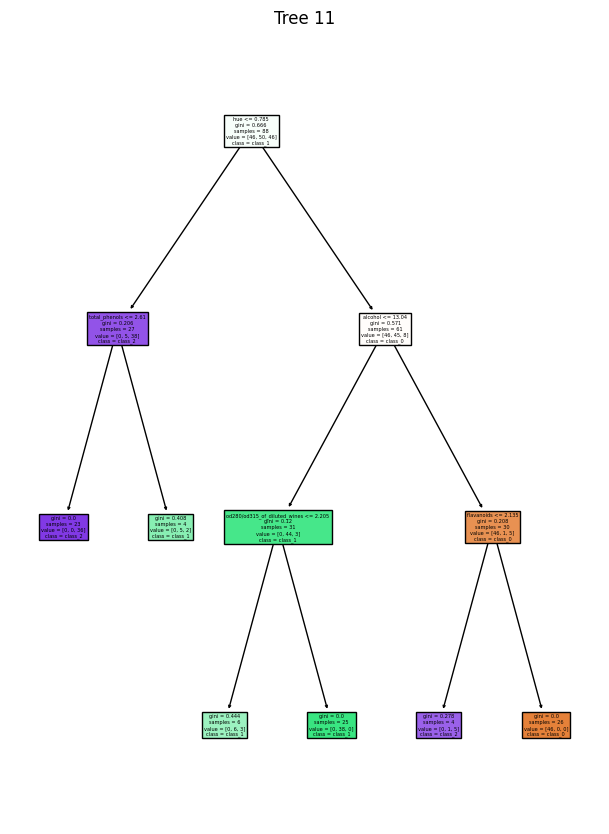

In [20]:
n_estimators = min(11,len(best_random_forest.estimators_))

for i in range(n_estimators):
    plt.figure(figsize=(35, 35))
    plt.subplot(3, 4, 1)
    plot_tree(
        best_random_forest.estimators_[i],
        filled=True,
        feature_names=wine.feature_names,
        class_names=wine.target_names,
    )
    plt.title(f"Tree {i+1}")
    plt.show()

/home/den4ick240/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


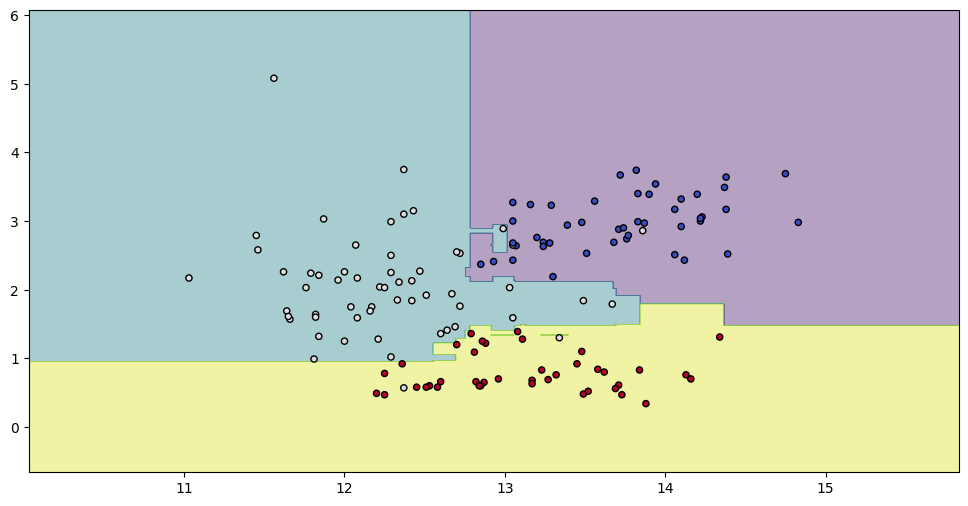

In [25]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')


# For visualization purposes, select only two features
X_train_2d = X_train[["alcohol", "flavanoids"]]
best_random_forest.fit(X_train_2d, y_train)

plt.figure(figsize=(12, 6))
plot_decision_boundary(best_random_forest, X_train_2d.values, y_train)